## **Import the Dependencies**

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=SettingWithCopyWarning)

## Read the csv file

In [2]:
df = pd.read_csv('/content/kidney_disease.csv')
print(df.shape)

(400, 26)


In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

## Take a look at the columns and their details

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

### Column Details

Below is a detailed description of each column in the dataset, along with their corresponding short names and units:

1. **Age (years) [age]:**
   - **Description:** Age Distribution by Classification
   - **Unit:** Age (years)

2. **Blood Pressure (mm Hg) [bp]:**
   - **Description:** Blood Pressure Distribution by Classification
   - **Unit:** Blood Pressure (mm Hg)

3. **Specific Gravity [sg]:**
   - **Description:** Specific Gravity Distribution by Classification
   - **Unit:** Specific Gravity

4. **Albumin Level [al]:**
   - **Description:** Albumin Level Distribution by Classification
   - **Unit:** Albumin Level

5. **Sugar Level [su]:**
   - **Description:** Sugar Level Distribution by Classification
   - **Unit:** Sugar Level

6. **PCC (Pus Cell Clumps) [pcc]:**
   - **Description:** PCC (Pus Cell Clumps) Distribution by Classification
   - **Unit:** PCC (Pus Cell Clumps)

7. **BA (Bacteria) [ba]:**
   - **Description:** BA (Bacteria) Distribution by Classification
   - **Unit:** BA (Bacteria)

8. **Blood Glucose Random (mg/dL) [bgr]:**
   - **Description:** Blood Glucose Random Distribution by Classification
   - **Unit:** Blood Glucose Random (mg/dL)

9. **Blood Urea (mg/dL) [bu]:**
   - **Description:** Blood Urea Distribution by Classification
   - **Unit:** Blood Urea (mg/dL)

10. **Serum Creatinine (mg/dL) [sc]:**
    - **Description:** Serum Creatinine Distribution by Classification
    - **Unit:** Serum Creatinine (mg/dL)

11. **Sodium (mmol/L) [sod]:**
    - **Description:** Sodium Distribution by Classification
    - **Unit:** Sodium (mmol/L)

12. **Potassium (mmol/L) [pot]:**
    - **Description:** Potassium Distribution by Classification
    - **Unit:** Potassium (mmol/L)

13. **Hemoglobin (g/dL) [hemo]:**
    - **Description:** Hemoglobin Level Distribution by Classification
    - **Unit:** Hemoglobin (g/dL)

14. **Packed Cell Volume (%) [pcv]:**
    - **Description:** Packed Cell Volume Distribution by Classification
    - **Unit:** Packed Cell Volume (%)

15. **White Blood Cell Count (cells/mcL) [wc]:**
    - **Description:** White Blood Cell Count Distribution by Classification
    - **Unit:** White Blood Cell Count (cells/mcL)

16. **Red Blood Cell Count (million cells/mcL) [rc]:**
    - **Description:** Red Blood Cell Count Distribution by Classification
    - **Unit:** Red Blood Cell Count (million cells/mcL)

17. **Hypertension (yes/no) [htn]:**
    - **Description:** Hypertension Distribution by Classification
    - **Unit:** Hypertension (yes/no)

18. **Diabetes Mellitus (yes/no) [dm]:**
    - **Description:** Diabetes Mellitus Distribution by Classification
    - **Unit:** Diabetes Mellitus (yes/no)

19. **Coronary Artery Disease (yes/no) [cad]:**
    - **Description:** Coronary Artery Disease Distribution by Classification
    - **Unit:** Coronary Artery Disease (yes/no)

20. **Appetite (good/poor) [appet]:**
    - **Description:** Appetite Distribution by Classification
    - **Unit:** Appetite (good/poor)

21. **Pedal Edema (yes/no) [pe]:**
    - **Description:** Pedal Edema Distribution by Classification
    - **Unit:** Pedal Edema (yes/no)

22. **Anemia (yes/no) [ane]:**
    - **Description:** Anemia Distribution by Classification
    - **Unit:** Anemia (yes/no)

23. **Kidney Disease Classification [classification]:**
    - **Description:** Kidney Disease Classification
    - **Unit:** Classification (ckd/notckd)


In [6]:
# Details for each column
details = {
    'age': ('Age Distribution by Classification', 'Age (years)'),
    'bp': ('Blood Pressure Distribution by Classification', 'Blood Pressure (mm Hg)'),
    'sg': ('Specific Gravity Distribution by Classification', 'Specific Gravity'),
    'al': ('Albumin Level Distribution by Classification', 'Albumin Level'),
    'su': ('Sugar Level Distribution by Classification', 'Sugar Level'),
    'pcc': ('PCC (Pus Cell Clumps) Distribution by Classification', 'PCC (Pus Cell Clumps)'),
    'ba': ('BA (Bacteria) Distribution by Classification', 'BA (Bacteria)'),
    'bgr': ('Blood Glucose Random Distribution by Classification', 'Blood Glucose Random (mg/dL)'),
    'bu': ('Blood Urea Distribution by Classification', 'Blood Urea (mg/dL)'),
    'sc': ('Serum Creatinine Distribution by Classification', 'Serum Creatinine (mg/dL)'),
    'sod': ('Sodium Distribution by Classification', 'Sodium (mmol/L)'),
    'pot': ('Potassium Distribution by Classification', 'Potassium (mmol/L)'),
    'hemo': ('Hemoglobin Level Distribution by Classification', 'Hemoglobin (g/dL)'),
    'pcv': ('Packed Cell Volume Distribution by Classification', 'Packed Cell Volume (%)'),
    'wc': ('White Blood Cell Count Distribution by Classification', 'White Blood Cell Count (cells/mcL)'),
    'rc': ('Red Blood Cell Count Distribution by Classification', 'Red Blood Cell Count (million cells/mcL)'),
    'htn': ('Hypertension Distribution by Classification', 'Hypertension (yes/no)'),
    'dm': ('Diabetes Mellitus Distribution by Classification', 'Diabetes Mellitus (yes/no)'),
    'cad': ('Coronary Artery Disease Distribution by Classification', 'Coronary Artery Disease (yes/no)'),
    'appet': ('Appetite Distribution by Classification', 'Appetite (good/poor)'),
    'pe': ('Pedal Edema Distribution by Classification', 'Pedal Edema (yes/no)'),
    'ane': ('Anemia Distribution by Classification', 'Anemia (yes/no)'),
    'classification': ('Kidney Disease Classification', 'Classification (ckd/notckd)')
}

## Take a look at the unique values of each column

In [7]:
for col in df.columns[1:]:
    print(df[col].unique())

[48. 58. nan 33. 46. 60. 50. 62. 54. 42. 72. 20. 56. 55. 70. 41. 36. 11.
 64. 66. 59. 68. 51. 75. 57. 35.  4. 43. 53. 45. 29. 44. 47. 61. 32. 19.
 73. 71. 63. 65. 26. 30. 76. 67. 34.  5. 74. 80. 22. 15. 39.  8. 69. 27.
 90. 83. 12. 79. 82. 24. 25. 17. 23. 14. 49. 40. 37. 78. 38.  3. 52. 21.
 28.  7.  2. 81.  6.]
[ 80.  70.  90.  60. 180.  nan 100. 110.  50. 120. 140.]
[1.005 1.02    nan 1.025 1.01  1.015]
[ 4.  0. nan  2.  3.  1.  5.]
[ 0. nan  4.  1.  3.  2.  5.]
['abnormal' 'normal' nan]
['abnormal' 'normal' nan]
['notpresent' 'present' nan]
['present' 'notpresent' nan]
[133. 100.  93.  89. 213.  nan 490. 132.  76. 109.  84. 123. 105. 124.
 298. 104.  74. 122.  85. 143. 184. 107. 128. 248. 233. 208. 106. 242.
 204. 156. 130. 214. 140.  99. 125. 288.  70. 360.  83. 158. 131. 108.
 121. 114.  81. 159. 250.  97. 127. 424. 246. 309. 141. 341.  75. 139.
 113. 137.  90. 219. 103. 173. 295. 447. 120. 215. 146. 110.  92.  86.
 415. 117. 192. 210. 172. 294.  78. 252. 239. 303. 463. 144. 207. 

In [8]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    # Strip leading/trailing whitespace from each value in the column
    df[col] = df[col].str.strip()

In [9]:
for col in df.columns[1:]:
    print(df[col].unique())

[48. 58. nan 33. 46. 60. 50. 62. 54. 42. 72. 20. 56. 55. 70. 41. 36. 11.
 64. 66. 59. 68. 51. 75. 57. 35.  4. 43. 53. 45. 29. 44. 47. 61. 32. 19.
 73. 71. 63. 65. 26. 30. 76. 67. 34.  5. 74. 80. 22. 15. 39.  8. 69. 27.
 90. 83. 12. 79. 82. 24. 25. 17. 23. 14. 49. 40. 37. 78. 38.  3. 52. 21.
 28.  7.  2. 81.  6.]
[ 80.  70.  90.  60. 180.  nan 100. 110.  50. 120. 140.]
[1.005 1.02    nan 1.025 1.01  1.015]
[ 4.  0. nan  2.  3.  1.  5.]
[ 0. nan  4.  1.  3.  2.  5.]
['abnormal' 'normal' nan]
['abnormal' 'normal' nan]
['notpresent' 'present' nan]
['present' 'notpresent' nan]
[133. 100.  93.  89. 213.  nan 490. 132.  76. 109.  84. 123. 105. 124.
 298. 104.  74. 122.  85. 143. 184. 107. 128. 248. 233. 208. 106. 242.
 204. 156. 130. 214. 140.  99. 125. 288.  70. 360.  83. 158. 131. 108.
 121. 114.  81. 159. 250.  97. 127. 424. 246. 309. 141. 341.  75. 139.
 113. 137.  90. 219. 103. 173. 295. 447. 120. 215. 146. 110.  92.  86.
 415. 117. 192. 210. 172. 294.  78. 252. 239. 303. 463. 144. 207. 

## Look for NULL values

In [10]:
# Check for NULL values in each column
null_values = df.isnull().sum()
print(null_values)

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


## Show the datatypes of each column

In [11]:
## Show Datatypes of each columns
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [12]:
# Convert 'pcv', 'wc', 'rc' columns to numeric types
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

## Work with the NULL values for the numerical columns

In [13]:
# Identify columns with data types 'int64' or 'float64'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Replace NaN values in these columns with the mean of the column
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()))

In [14]:
# Check for NULL values in each column
null_values = df.isnull().sum()
print(null_values)

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [15]:
df['rbc']

,rbc
0,abnormal
1,normal
2,NaN
3,normal
4,NaN
...,...
395,normal
396,abnormal
397,normal
398,NaN


In [16]:
df['pc']

,pc
0,abnormal
1,normal
2,NaN
3,normal
4,normal
...,...
395,abnormal
396,normal
397,normal
398,abnormal


## Drop rbc and pc columns

In [17]:
# Drop the 'rbc' and 'pc' columns
df.drop(columns=['rbc', 'pc'], inplace=True)

In [18]:
# Check for NULL values in each column
null_values = df.isnull().sum()
print(null_values)

id                0
age               0
bp                0
sg                0
al                0
su                0
pcc               4
ba                4
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64


## Check for multiple NULLs in the same row

In [19]:
nan_counts_per_row = df.isna().sum(axis=1)

# Identify rows where the number of NaN values is 2 or more
rows_with_multiple_nans = df[nan_counts_per_row >= 2]

# Display the result
print(f"Number of rows with 2 or more NaNs: {len(rows_with_multiple_nans)}")
print(rows_with_multiple_nans)

Number of rows with 2 or more NaNs: 7
      id   age         bp     sg   al   su         pcc          ba    bgr  \
8    290  54.0  70.000000  1.020  0.0  0.0         NaN         NaN   76.0   
42   316  35.0  76.469072  1.020  0.0  0.0         NaN         NaN   99.0   
226  297  53.0  60.000000  1.025  0.0  0.0  notpresent  notpresent  116.0   
236  288  56.0  70.000000  1.025  0.0  0.0  notpresent  notpresent   70.0   
250  328  28.0  70.000000  1.020  0.0  0.0         NaN         NaN  131.0   
288  294  75.0  60.000000  1.020  0.0  0.0  notpresent  notpresent  110.0   
385  300  45.0  60.000000  1.020  0.0  0.0         NaN         NaN  114.0   

       bu  ...   pcv       wc   rc  htn   dm  cad  appet   pe  ane  \
8    28.0  ...  52.0   8400.0  5.9   no   no   no   good   no   no   
42   30.0  ...  48.0   5000.0  5.2   no   no   no   good   no   no   
226  26.0  ...  45.0   7700.0  5.2  NaN  NaN  NaN   good   no   no   
236  46.0  ...  50.0  11000.0  5.1  NaN  NaN  NaN   good   no   n

## Drop 7 rows having multiple NULLs

In [20]:
# Count the number of NaN values in each row
nan_counts_per_row = df.isna().sum(axis=1)

# Remove rows where the number of NaN values is 2 or more
df_cleaned = df[nan_counts_per_row < 2]

In [21]:
# Check for NULL values in each column
null_values = df_cleaned.isnull().sum()
print(null_values)

id                0
age               0
bp                0
sg                0
al                0
su                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [22]:
df_cleaned.shape

(393, 24)

In [23]:
df_cleaned

,id,age,bp,sg,al,su,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,76,48.000000,80.0,1.005000,4.000000,0.000000,notpresent,present,133.0,139.0,...,36.000000,6200.000000,4.000000,no,yes,no,good,yes,no,ckd
1,325,58.000000,80.0,1.020000,0.000000,0.000000,notpresent,notpresent,100.0,50.0,...,50.000000,6700.000000,6.500000,no,no,no,good,no,no,notckd
2,30,51.483376,70.0,1.017408,1.016949,0.450142,notpresent,notpresent,93.0,155.0,...,38.884498,8406.122449,4.707435,yes,yes,no,good,no,no,ckd
3,362,33.000000,80.0,1.025000,0.000000,0.000000,notpresent,notpresent,89.0,19.0,...,40.000000,10300.000000,4.800000,no,no,no,good,no,no,notckd
4,136,46.000000,90.0,1.020000,1.016949,0.450142,notpresent,notpresent,213.0,68.0,...,38.884498,8406.122449,4.707435,yes,yes,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,40,46.000000,90.0,1.010000,2.000000,0.000000,notpresent,notpresent,99.0,80.0,...,32.000000,9100.000000,4.100000,yes,no,no,good,no,no,ckd
396,91,56.000000,70.0,1.015000,4.000000,1.000000,notpresent,notpresent,210.0,26.0,...,52.000000,12500.000000,5.600000,no,no,no,good,no,no,ckd
397,261,49.000000,80.0,1.020000,0.000000,0.000000,notpresent,notpresent,122.0,32.0,...,41.000000,5600.000000,4.900000,no,no,no,good,no,no,notckd
398,19,62.000000,60.0,1.015000,1.000000,0.000000,present,notpresent,100.0,31.0,...,30.000000,5300.000000,3.700000,yes,no,yes,good,no,no,ckd


## Plot the data column wise

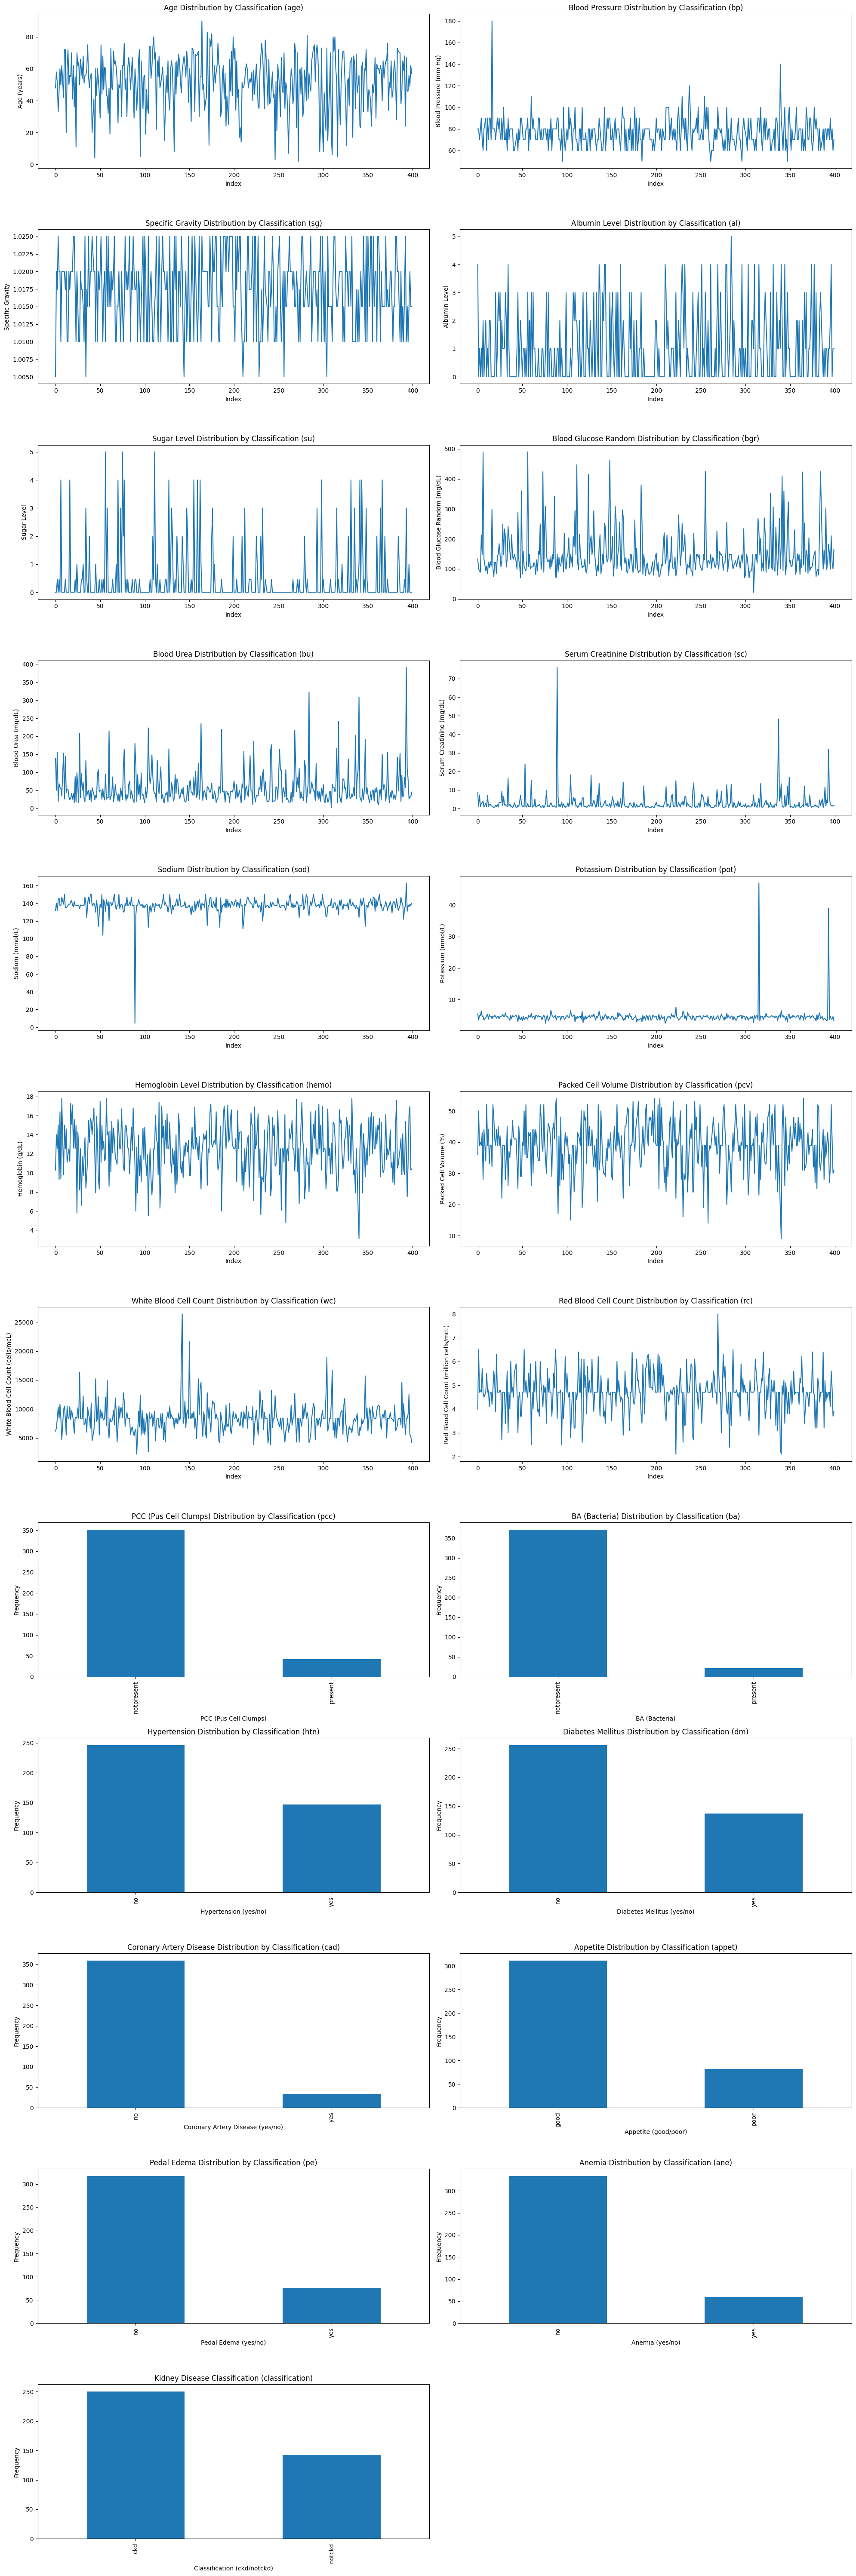

In [24]:
# Numeric columns (excluding the first 'id' column)
numeric_cols = df_cleaned.select_dtypes(include='number').columns[1:]
num_numeric_cols = len(numeric_cols)

# Categorical columns (excluding the first 'id' column if applicable)
categorical_cols = df_cleaned.select_dtypes(exclude='number').columns
num_categorical_cols = len(categorical_cols)

# Total columns and rows needed for subplots
total_cols = 2
total_plots = num_numeric_cols + num_categorical_cols
total_rows = math.ceil(total_plots / total_cols)

# Create subplots
fig, axes = plt.subplots(total_rows, total_cols, figsize=(20, 5 * total_rows))
axes = axes.flatten()

# Plot numeric columns
for i, col in enumerate(numeric_cols):
    axes[i].plot(df_cleaned[col])
    axes[i].set_title(f'{details[col][0]} ({col})')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(details[col][1])

# Plot categorical columns
for i, col in enumerate(categorical_cols, start=num_numeric_cols):
    df_cleaned[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{details[col][0]} ({col})')
    axes[i].set_xlabel(details[col][1])
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for i in range(total_plots, total_rows * total_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Plot correlation between features and result

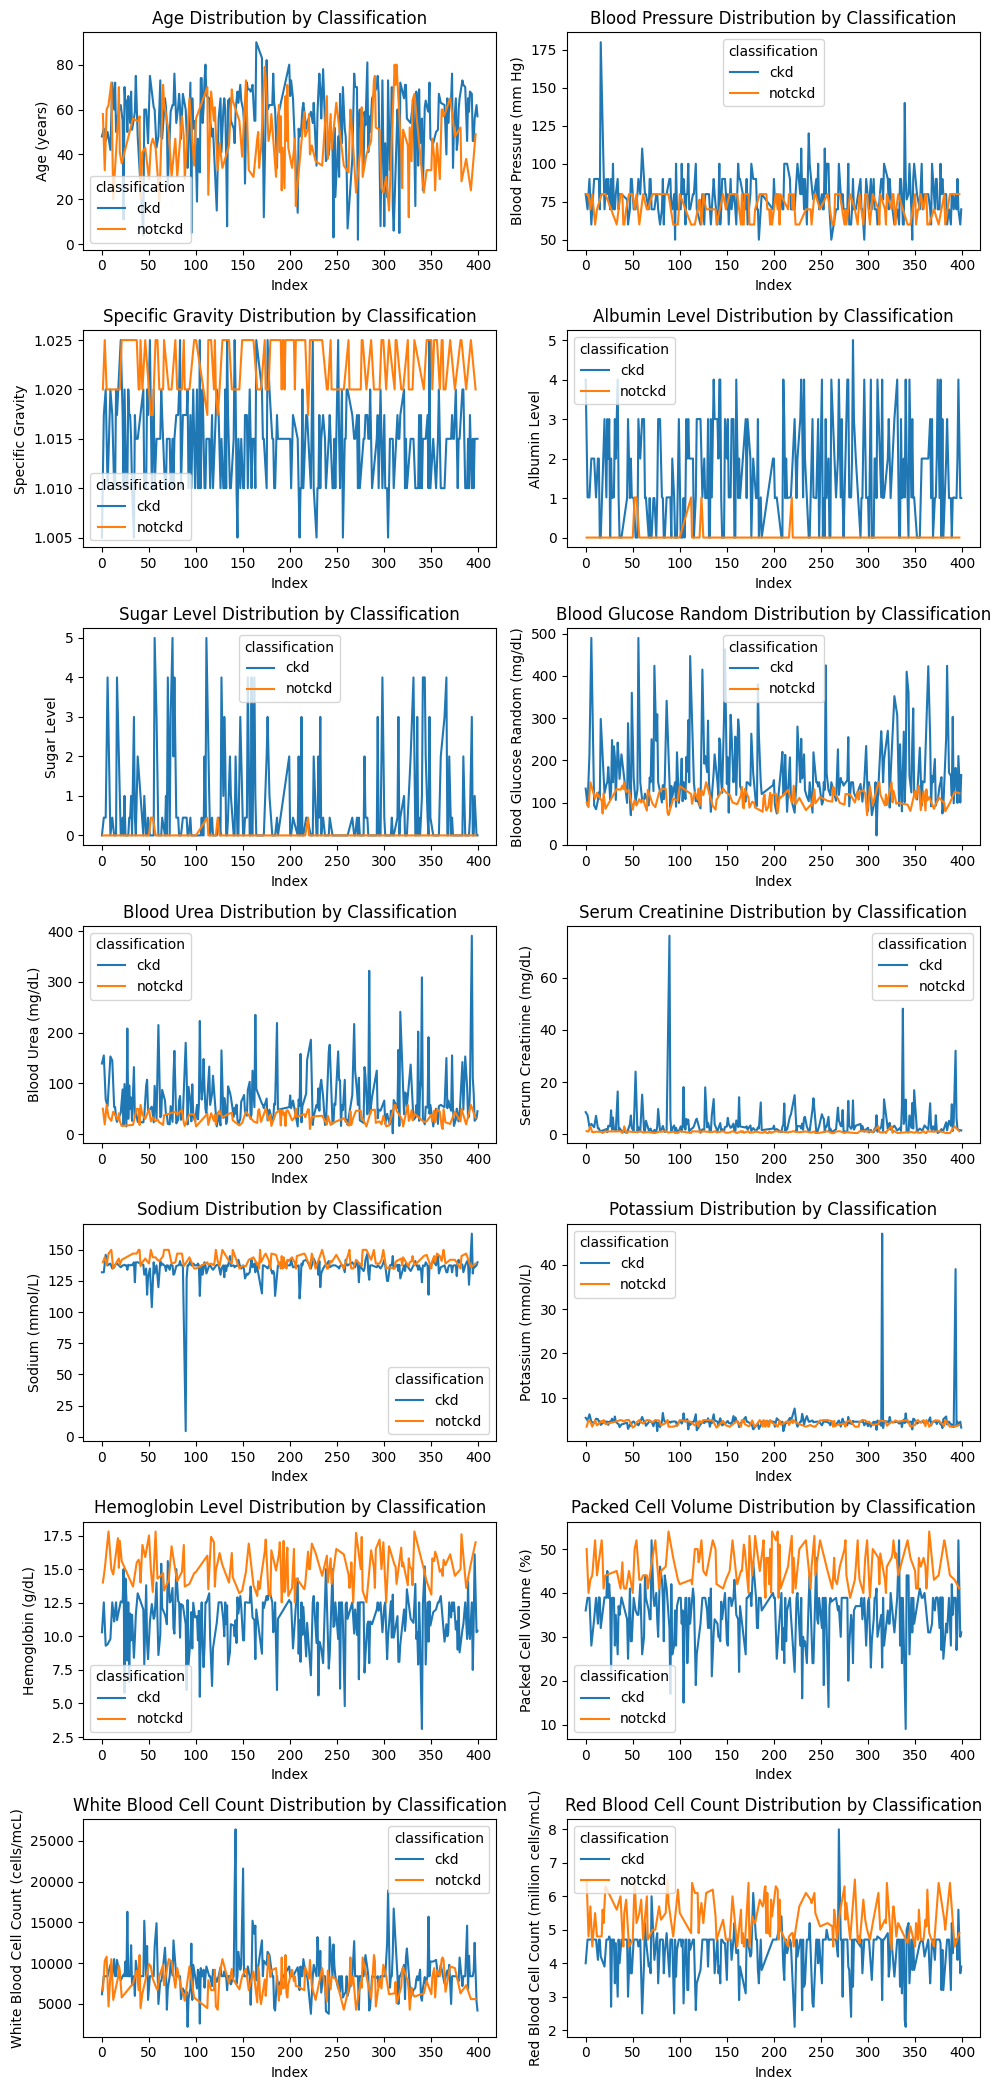

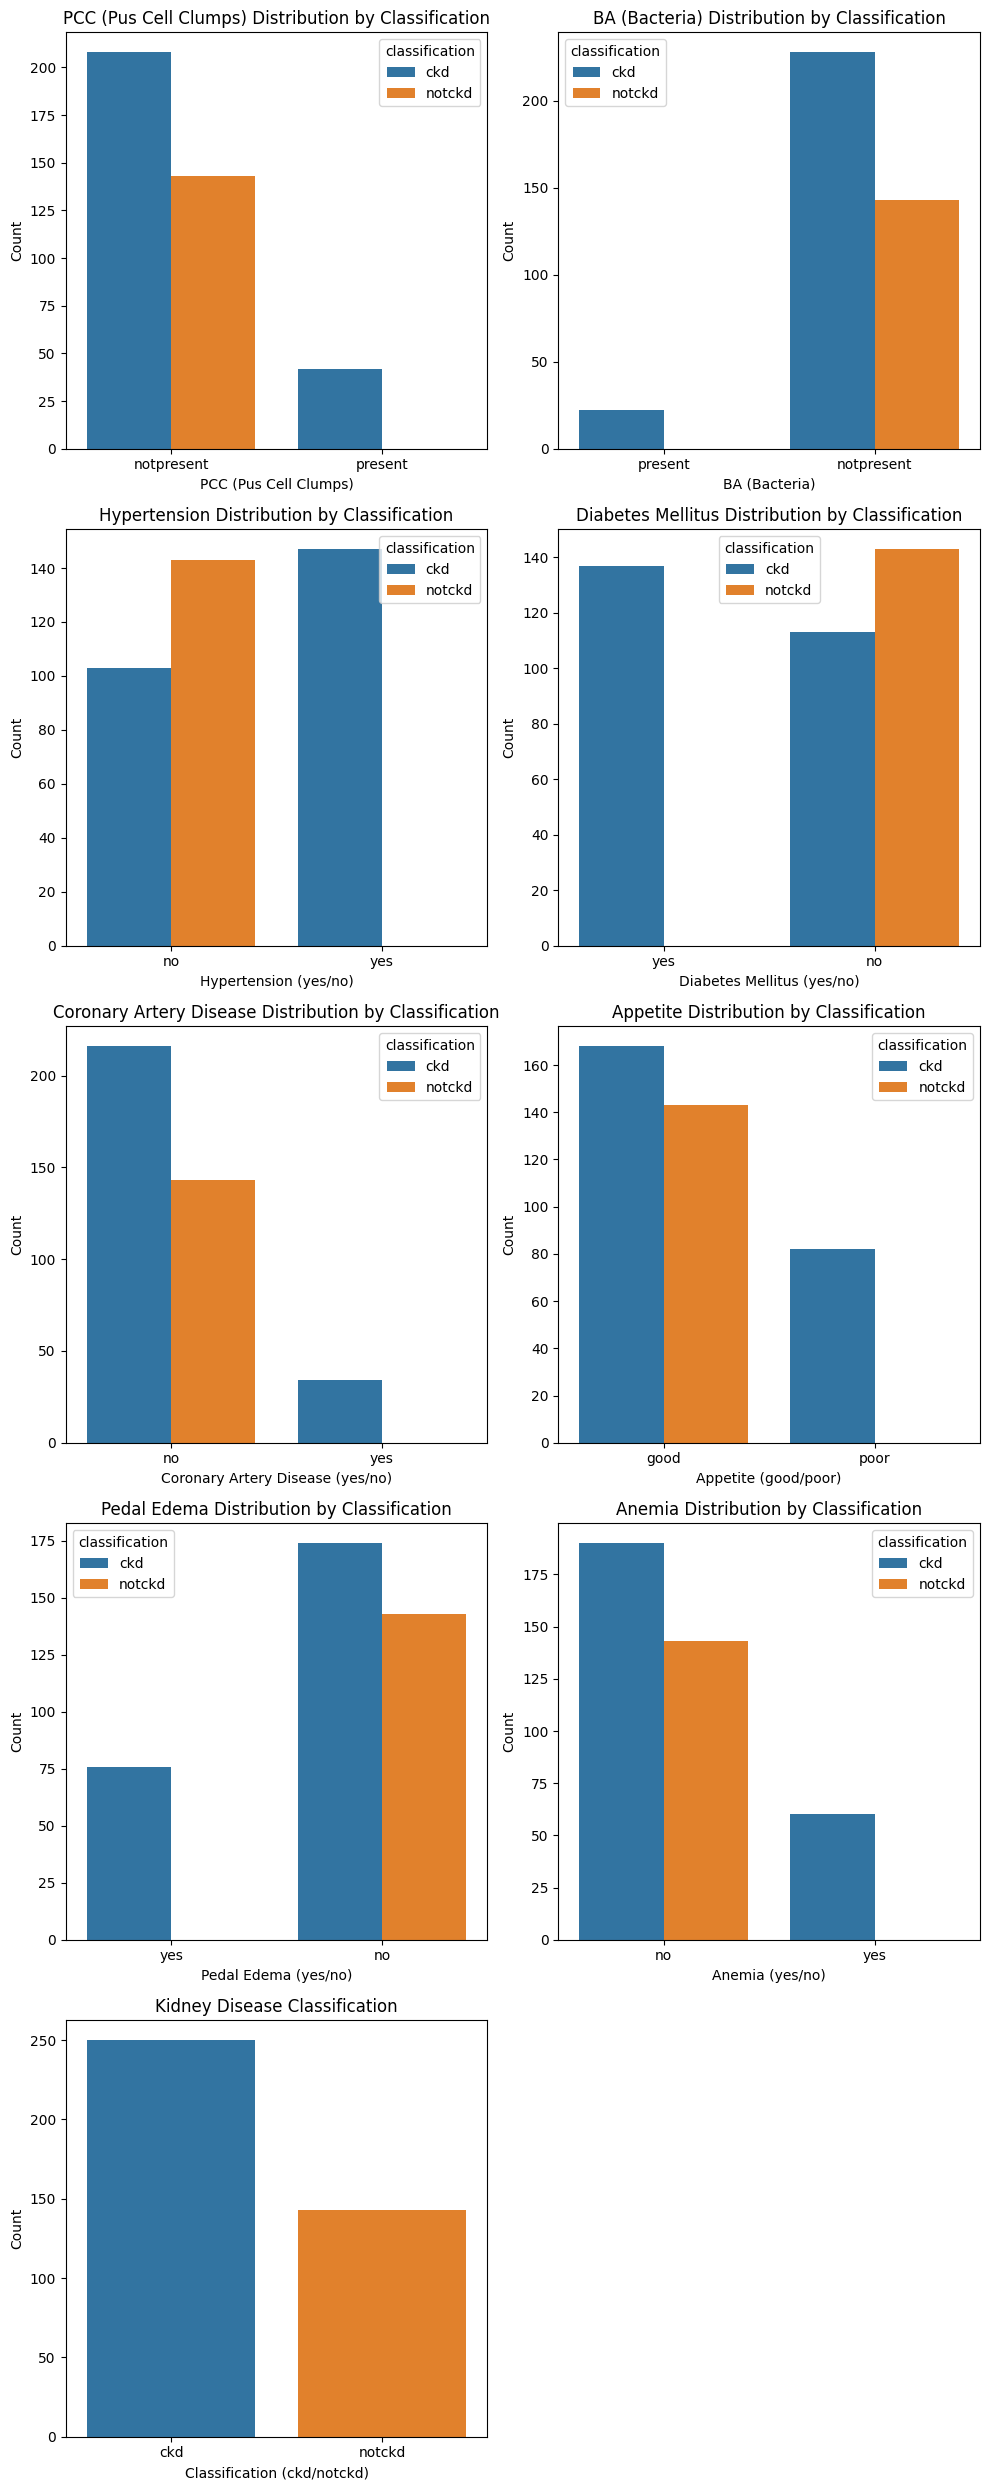

In [25]:
# Exclude 'id' column and start from the second column
df_without_id = df_cleaned.iloc[:, 1:]

# Numeric columns
numeric_cols = df_without_id.select_dtypes(include='number').columns

# Categorical columns
categorical_cols = df_without_id.select_dtypes(exclude='number').columns

# Set the number of columns per row in the subplot
num_cols = 2

# Plotting numeric columns against classification
num_plots = len(numeric_cols)
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 3))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.lineplot(x=df_without_id.index, y=col, hue='classification', data=df_without_id, ax=axs[i])
    axs[i].set_title(f'{details[col][0]}')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(details[col][1])

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Plotting categorical columns against classification
cat_plots = len(categorical_cols)
num_rows = (cat_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='classification', data=df_without_id, ax=axs[i])
    axs[i].set_title(f'{details[col][0]}')
    axs[i].set_xlabel(details[col][1])
    axs[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## Feature Engineering

In [26]:
# Encode categorical variables if they exist
le = LabelEncoder()
categorical_columns = ['pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Split data into features (X) and target (y)
X = df_cleaned.drop(columns=['classification'])  # Features
X = X.drop(columns=['id'])
y = df_cleaned['classification']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)


## SVM

SVM Accuracy: 1.0000
SVM Precision: 1.0000
SVM Recall: 1.0000
SVM F1 Score: 1.0000


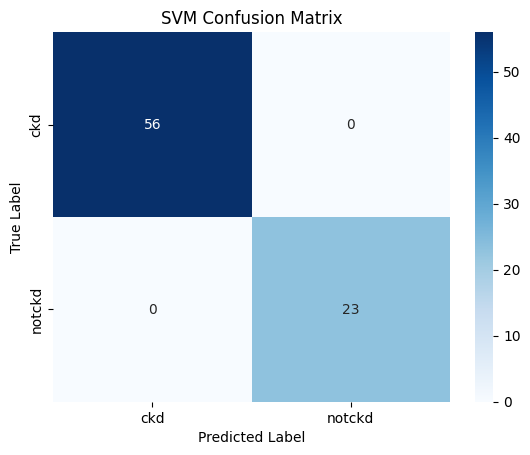

SVM True Positives: 23
SVM False Positives: 0
SVM True Negatives: 56
SVM False Negatives: 0


In [27]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Print the metrics
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Inverse transform the label encoding for proper names
labels = le.inverse_transform([0, 1])  # Assuming binary classification. Adjust range if there are more classes

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# True Positives, False Positives, True Negatives, False Negatives
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()
print(f"SVM True Positives: {tp_svm}")
print(f"SVM False Positives: {fp_svm}")
print(f"SVM True Negatives: {tn_svm}")
print(f"SVM False Negatives: {fn_svm}")

## Random Forest

Random Forest Accuracy: 0.9873
Random Forest Precision: 0.9876
Random Forest Recall: 0.9873
Random Forest F1 Score: 0.9873


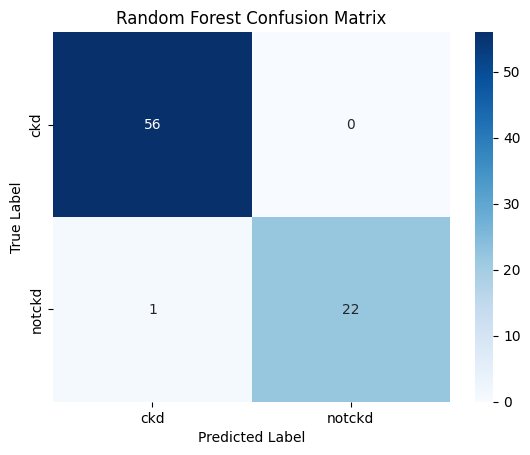

Random Forest True Positives: 22
Random Forest False Positives: 0
Random Forest True Negatives: 56
Random Forest False Negatives: 1


In [28]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the metrics
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
labels = le.inverse_transform([0, 1])  # Assuming binary classification. Adjust range if there are more classes
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# True Positives, False Positives, True Negatives, False Negatives
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
print(f"Random Forest True Positives: {tp_rf}")
print(f"Random Forest False Positives: {fp_rf}")
print(f"Random Forest True Negatives: {tn_rf}")
print(f"Random Forest False Negatives: {fn_rf}")

## Logistic Regression

Logistic Regression Accuracy: 1.0000
Logistic Regression Precision: 1.0000
Logistic Regression Recall: 1.0000
Logistic Regression F1 Score: 1.0000


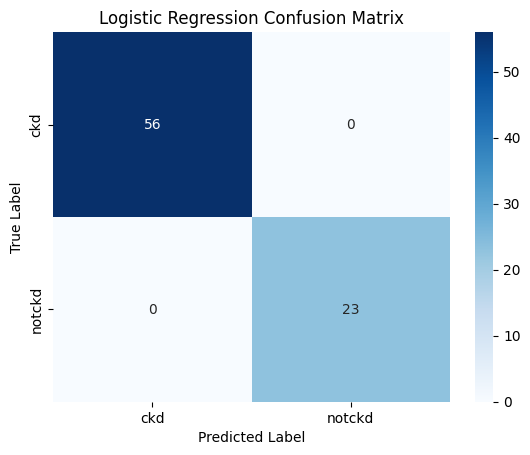

Logistic Regression True Positives: 23
Logistic Regression False Positives: 0
Logistic Regression True Negatives: 56
Logistic Regression False Negatives: 0


In [29]:
# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print the metrics
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
labels = le.inverse_transform([0, 1])  # Assuming binary classification. Adjust range if there are more classes
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# True Positives, False Positives, True Negatives, False Negatives
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
print(f"Logistic Regression True Positives: {tp_lr}")
print(f"Logistic Regression False Positives: {fp_lr}")
print(f"Logistic Regression True Negatives: {tn_lr}")
print(f"Logistic Regression False Negatives: {fn_lr}")

## Compare Three models

In [31]:
# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_svm, accuracy_rf, accuracy_lr],
    'Precision': [precision_svm, precision_rf, precision_lr],
    'Recall': [recall_svm, recall_rf, recall_lr],
    'F1 Score': [f1_svm, f1_rf, f1_lr],
    'True Positives (TP)': [tp_svm, tp_rf, tp_lr],
    'False Positives (FP)': [fp_svm, fp_rf, fp_lr],
    'True Negatives (TN)': [tn_svm, tn_rf, tn_lr],
    'False Negatives (FN)': [fn_svm, fn_rf, fn_lr]
})

comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,True Positives (TP),False Positives (FP),True Negatives (TN),False Negatives (FN)
0,SVM,1.000000,1.000000,1.000000,1.000000,23,0,56,0
1,Random Forest,0.987342,0.987564,0.987342,0.987257,22,0,56,1
2,Logistic Regression,1.000000,1.000000,1.000000,1.000000,23,0,56,0
